In [31]:
#import libraries
import pandas as pd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [3]:
#load dataset
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#create target passed which is >= 60
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['passed'] = (df['average_score'] >= 60).astype(int)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1


In [5]:
df['test preparation course'] = df['test preparation course'].map({
    'none': 0,
    'completed': 1
})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,female,group B,bachelor's degree,standard,0,72,72,74,72.666667,1
1,female,group C,some college,standard,1,69,90,88,82.333333,1
2,female,group B,master's degree,standard,0,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,0,47,57,44,49.333333,0
4,male,group C,some college,standard,0,76,78,75,76.333333,1


In [6]:
#encode the categorical data
categories_data = ['gender', 'race/ethnicity', 'parental level of education', 'lunch']
for col in categories_data:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,passed
0,0,1,1,1,0,72,72,74,72.666667,1
1,0,2,4,1,1,69,90,88,82.333333,1
2,0,1,3,1,0,90,95,93,92.666667,1
3,1,0,0,0,0,47,57,44,49.333333,0
4,1,2,4,1,0,76,78,75,76.333333,1


In [7]:
#starting point
X = df.drop(columns=["average_score", "passed"])
y = df['passed']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
rf_y_pred = model_rf.predict(X_test)

In [11]:
print("Accuracy Score:", accuracy_score(y_test, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))

Accuracy Score: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        62
           1       0.99      0.98      0.99       138

    accuracy                           0.98       200
   macro avg       0.97      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [12]:
fig = px.histogram(
    df, 
    x="average_score", 
    color="passed", 
    nbins=30, 
    title="Student Score Distribution by Pass/Fail"
)
fig.show()

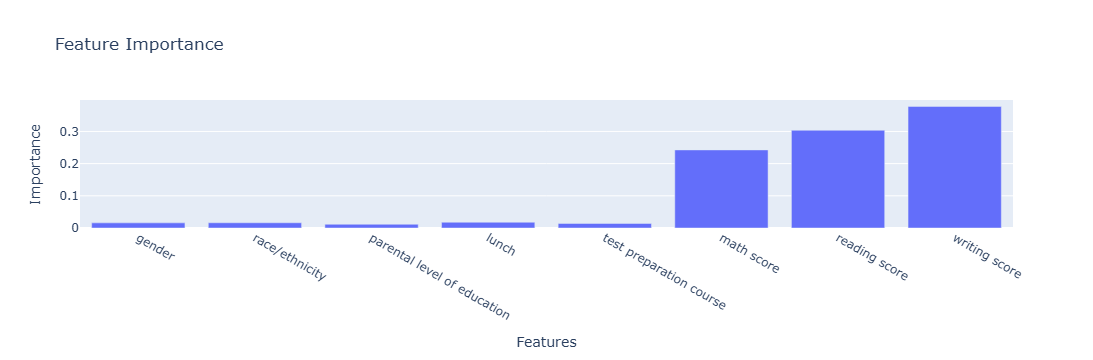

In [13]:
import plotly.graph_objects as go

importance = model_rf.feature_importances_
features = X.columns

fig = go.Figure([go.Bar(x=features, y=importance)])
fig.update_layout(title='Feature Importance', xaxis_title='Features', yaxis_title='Importance')
fig.show()

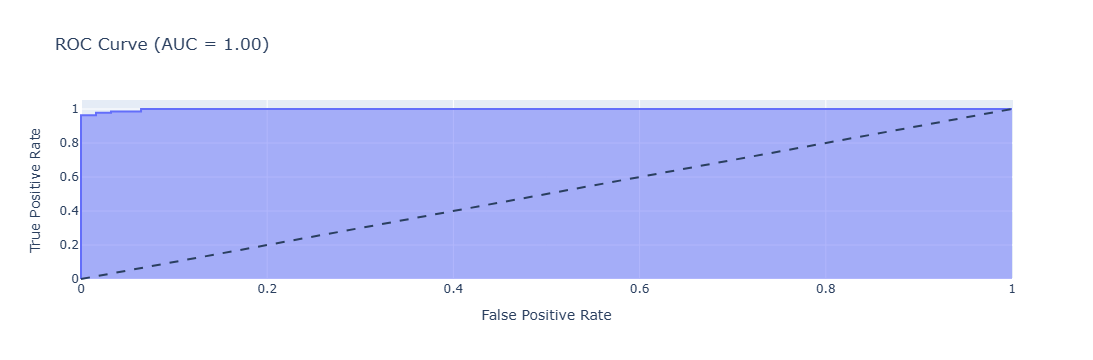

In [14]:
y_proba = model_rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, name="ROC Curve", fill='tozeroy'))
fig.add_shape(type="line", x0=0, y0=0, x1=1, y1=1, line=dict(dash="dash"))
fig.update_layout(title=f"ROC Curve (AUC = {roc_auc:.2f})", xaxis_title="False Positive Rate", yaxis_title="True Positive Rate")
fig.show()

In [15]:
scores = cross_val_score(model_rf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.99  0.96  0.995 0.985 0.995]
Mean accuracy: 0.985


In [18]:
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [19]:
y_pred_tree = tree_clf.predict(X_test)

In [21]:
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Accuracy (Decision Tree): 0.95
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.97      0.96      0.96       138

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.95      0.95       200



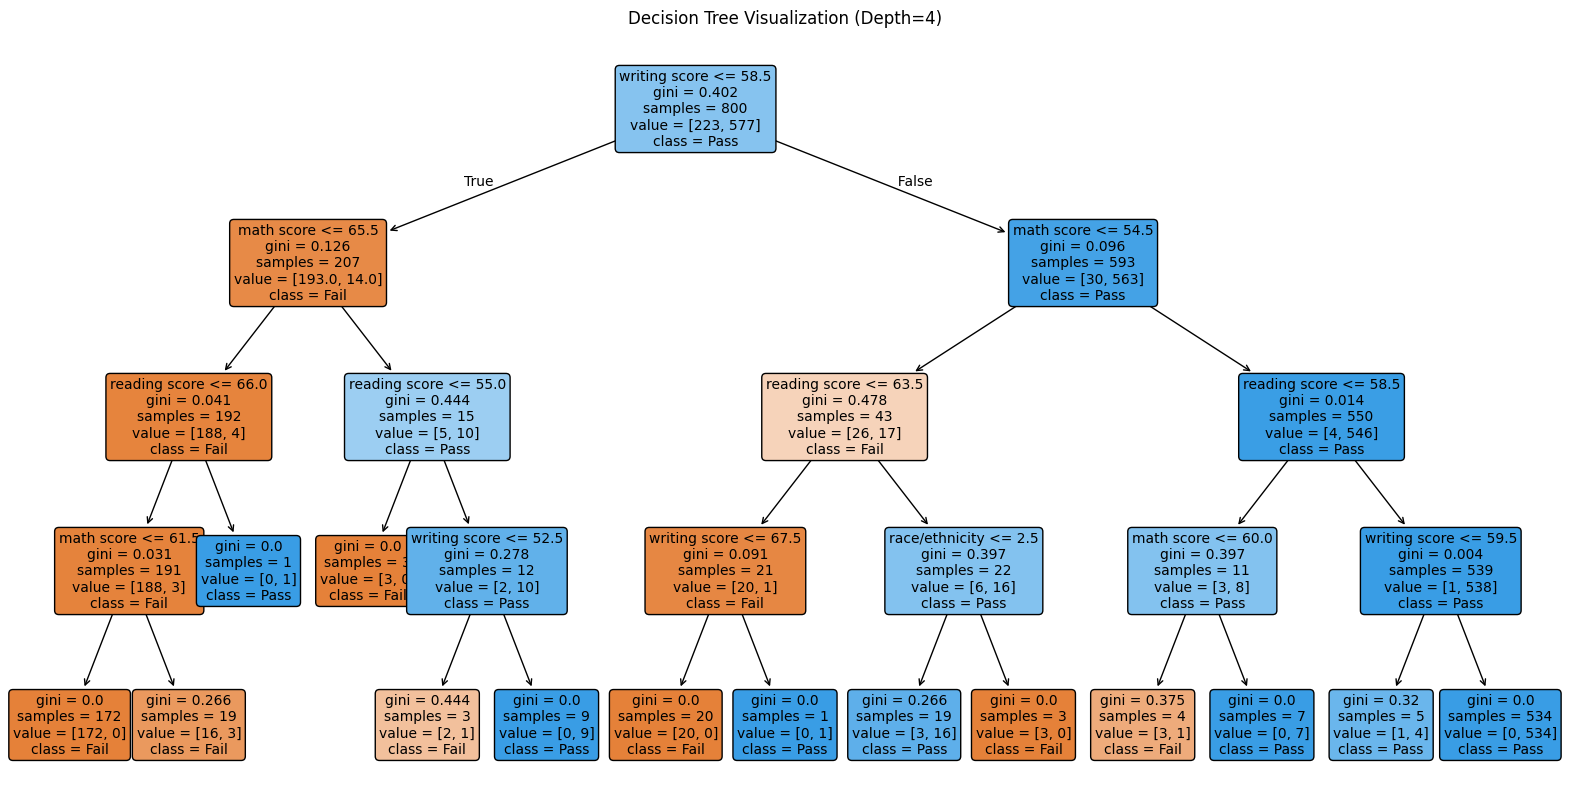

[Text(0.4423076923076923, 0.9, 'writing score <= 58.5\ngini = 0.402\nsamples = 800\nvalue = [223, 577]\nclass = Pass'),
 Text(0.19230769230769232, 0.7, 'math score <= 65.5\ngini = 0.126\nsamples = 207\nvalue = [193.0, 14.0]\nclass = Fail'),
 Text(0.3173076923076923, 0.8, 'True  '),
 Text(0.11538461538461539, 0.5, 'reading score <= 66.0\ngini = 0.041\nsamples = 192\nvalue = [188, 4]\nclass = Fail'),
 Text(0.07692307692307693, 0.3, 'math score <= 61.5\ngini = 0.031\nsamples = 191\nvalue = [188, 3]\nclass = Fail'),
 Text(0.038461538461538464, 0.1, 'gini = 0.0\nsamples = 172\nvalue = [172, 0]\nclass = Fail'),
 Text(0.11538461538461539, 0.1, 'gini = 0.266\nsamples = 19\nvalue = [16, 3]\nclass = Fail'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Pass'),
 Text(0.2692307692307692, 0.5, 'reading score <= 55.0\ngini = 0.444\nsamples = 15\nvalue = [5, 10]\nclass = Pass'),
 Text(0.23076923076923078, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Fail'

In [33]:
plt.figure(figsize=(20, 10))
test = plot_tree(tree_clf,
          feature_names=X.columns,
          class_names=["Fail", "Pass"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Depth=4)")
plt.show()
test

# graph = graphviz.Source(dot_data)
# graph.render("tree_visual", format="png", cleanup=False)  # Creates PNG file
# graph.view()  # Open it
